# Doctor's Consultation Fees Prediction

We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.?

In [211]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [212]:
#Importing the train dataset.
train=pd.read_excel('Final_Train.xlsx')

In [213]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [214]:
#cheking shape of the dataset
df.shape

(5961, 7)

We have 5961 rows and 7 columns.

In [215]:
#cheking column names
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

Independent variable:

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaneous_Info: Extra information about the doctor

Place: Area and the city where the doctor is located.

Target variable:

Fees: Fees charged by the doctor 

In [216]:
#Checking data type
df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

All the independent variables are of object type.

Target variable fees is of integer type.

In [217]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

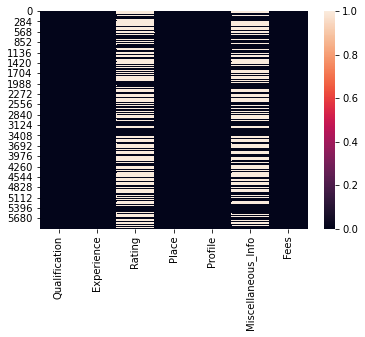

In [218]:
sns.heatmap(df.isnull())

Rating, place and miscellaneous info have null values in them.

In [219]:
df.describe(include='all')

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
count,5961,5961,2659,5936,5961,3341,5961.000000
unique,1420,64,51,877,6,2998,NaN
top,BDS,9 years experience,100%,"HSR Layout, Bangalore",Dentist,Acrylic Partial Denture Crowns and Bridges Fix...,NaN
freq,488,323,684,75,1397,40,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,307.944640
std,NaN,NaN,NaN,NaN,NaN,NaN,190.920373
min,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,150.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,300.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,500.000000


Observations:

Qualification have 1420 uniques values and the qualification acquired by most of the doctors is BDS.

Experience have 64 unique values, most of the doctors have 9 years of experience.

Rating have 51 unique values and 100% rating is given to most of the doctors.

Place have 877 unique values, it contains locality and city seperated by ','.

Profile have 6 unique values, most of the profiles are of dentist.

Miscellaneous info have 2998 unique values.

Minimum fee is 5 and maximum is 950.

Data is very messy as we have large number of unique values in most of the columns. Lets deal with them column wise.

In [220]:
#Creating a new column qualification count to see how many qualification each doctor have
df['Qualification_count'] = df['Qualification'].apply(lambda x: len(x.split(",")))
df['Qualification_count'].value_counts()

2     2628
1     1962
3      995
4      257
5       84
6       23
7        6
9        3
8        2
10       1
Name: Qualification_count, dtype: int64

In [221]:
df['Qualification'].unique()

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery',
       'BDS, certification in smile designing',
       'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)'],
      dtype=object)

There are a number of Qualifications but most of doctors only has 1 or 2 qualification.
And the data is too messy therefore we will take the top 10 Qualification that occurs the most.

In [222]:
# creating dict of qualification with there counts
df["Qualification"]=df["Qualification"].str.split(",")
Qualification ={}
for x in df["Qualification"].values:
    for each in x:
        each=each.strip()
        if each in Qualification:
            Qualification[each]+=1
        else:
            Qualification[each]=1

In [223]:
#Extracting top 10 qualification
most_qual=sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final_qual=[]
for qual in most_qual:
    final_qual.append(qual[0])
    
print(final_qual)


['MBBS', 'BDS', 'BAMS', 'BHMS', 'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy', 'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)', 'MD - Homeopathy']


In [224]:
#Encoding extracted top 10 qualification into the dataset as new columns.
for qual in final_qual:
    df[qual]=0

for x,y in zip(df['Qualification'].values, np.array([i for i in range(len(df))])):
    for c in x:
        c=c.strip()
        if c in final_qual:
            df[c][y]=1

In [225]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Qualification_count,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,"[BHMS, MD - Homeopathy]",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,2,0,0,0,1,0,0,0,0,0,1
1,"[BAMS, MD - Ayurveda Medicine]",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,2,0,0,1,0,0,0,0,0,0,0
2,"[MBBS, MS - Otorhinolaryngology]",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,2,1,0,0,0,0,0,0,0,0,0
3,"[BSc - Zoology, BAMS]",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,2,0,0,1,0,0,0,0,0,0,0
4,[BAMS],20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,1,0,0,1,0,0,0,0,0,0,0


In [226]:
# Now we can drop the qualification and qualification count columns 
df.drop(['Qualification','Qualification_count'],axis=1,inplace=True)

In [227]:
df.head()

,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,0,0,0,1,0,0,0,0,0,1
1,12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,0,0,1,0,0,0,0,0,0,0
2,9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,1,0,0,0,0,0,0,0,0,0
3,12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,0,0,1,0,0,0,0,0,0,0
4,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,0,0,1,0,0,0,0,0,0,0


Experience column have 'year experience' string after the numeric experience year, to train the model we need to remove the string 'year experience' and convert the remaning into numeric data.

In [228]:
# Extracting only experience Year from Experience column and converting it to Numeric.
df['Experience'] = df['Experience'].str.split().str[0]
df['Experience'] = df['Experience'].astype(int)

In [229]:
df.head()

,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,0,0,0,1,0,0,0,0,0,1
1,12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,0,0,1,0,0,0,0,0,0,0
2,9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,1,0,0,0,0,0,0,0,0,0
3,12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,0,0,1,0,0,0,0,0,0,0
4,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,0,0,1,0,0,0,0,0,0,0


In [230]:
#As, there are missing values in Place column so we will replace them with Unknown, Unknown(locality,city) to represent them. So that we can easily extract city and locality from Place variable.
df.Place.fillna('Unknown,Unknown',inplace=True)

#Separating locality and city in individual columns.
df['locality']=df['Place'].str.split(",").str[0]
df['city']=df['Place'].str.split(",").str[1]

#Now we can drop the place variable
df.drop('Place',axis=1,inplace=True)

In [231]:
df.head()

,Experience,Rating,Profile,Miscellaneous_Info,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,locality,city
0,24,100%,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,0,0,0,1,0,0,0,0,0,1,Kakkanad,Ernakulam
1,12,98%,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,0,0,1,0,0,0,0,0,0,0,Whitefield,Bangalore
2,9,NaN,ENT Specialist,NaN,300,1,0,0,0,0,0,0,0,0,0,Mathikere - BEL,Bangalore
3,12,NaN,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,0,0,1,0,0,0,0,0,0,0,Bannerghatta Road,Bangalore
4,20,100%,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,0,0,1,0,0,0,0,0,0,0,Keelkattalai,Chennai


In [234]:
# Filling the missing values in rating column with -99% to provide them different importance.
df['Rating'].fillna('-99%',inplace=True)

In [235]:
# extracting value of rating to avoid '%' and converting it to numeric
df['Rating'] = df['Rating'].str.slice(stop=-1).astype(int)

In [237]:
#Creating bins for ratings
bins=[-99,0,10,20,30,40,50,60,70,80,90,100]
labels=[i for i in range(11)]
df['Rating']=pd.cut(df['Rating'], bins=bins, labels=labels, include_lowest=True)

In [238]:
#Checking the bins created
df['Rating'].value_counts().sort_index()

0     3302
1        1
2        0
3        0
4        4
5        3
6       19
7       32
8       98
9      280
10    2222
Name: Rating, dtype: int64

In [239]:
df.head()

,Experience,Rating,Profile,Miscellaneous_Info,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,locality,city
0,24,10,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,0,0,0,1,0,0,0,0,0,1,Kakkanad,Ernakulam
1,12,10,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,0,0,1,0,0,0,0,0,0,0,Whitefield,Bangalore
2,9,0,ENT Specialist,NaN,300,1,0,0,0,0,0,0,0,0,0,Mathikere - BEL,Bangalore
3,12,0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,0,0,1,0,0,0,0,0,0,0,Bannerghatta Road,Bangalore
4,20,10,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,0,0,1,0,0,0,0,0,0,0,Keelkattalai,Chennai


In [245]:
#Checking city counts
df['city'].unique()

array(['Ernakulam', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad',
       'Coimbatore', 'Mumbai', 'Thiruvananthapuram', 'Unknown', 'Sector5',
       'nan'], dtype=object)

In [246]:
# removing the extra spaces before the city
import re
df['city'] = df['city'].apply(lambda x: re.sub(' +','',str(x)))

In [247]:
# city contains some unrelevent data(Sector5 and nan)
df[(df['city'] == "nan") | (df['city'] == "Sector5")]

,Experience,Rating,Profile,Miscellaneous_Info,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,locality,city
2169,11,0,Dentist,NaN,250,0,1,0,0,0,0,0,0,0,0,Dwarka,Sector5
3980,23,0,Dentist,NaN,250,0,1,0,0,0,0,0,0,0,0,e,nan


In [248]:
df[df['locality'] == 'Dwarka'] 

,Experience,Rating,Profile,Miscellaneous_Info,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,locality,city
166,7,0,Dentist,Wisdom Tooth Extraction Oral & Maxillofacial S...,300,0,1,0,0,0,0,0,0,0,0,Dwarka,Delhi
299,8,0,Homeopath,NaN,250,0,0,0,1,0,0,0,0,0,0,Dwarka,Delhi
306,31,0,General Medicine,NaN,300,1,0,0,0,0,0,0,0,0,0,Dwarka,Delhi
485,30,0,Ayurveda,NaN,200,0,0,1,0,0,0,0,0,0,0,Dwarka,Delhi
690,19,10,General Medicine,"98% 72 Feedback Dwarka, Delhi",700,1,0,0,0,0,0,0,0,0,0,Dwarka,Delhi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5612,30,7,ENT Specialist,"67% 5 Feedback Dwarka, Delhi",400,1,0,0,0,0,1,0,0,0,0,Dwarka,Delhi
5685,19,10,Dermatologists,"98% 10 Feedback Dwarka, Delhi",400,1,0,0,0,0,0,0,0,0,0,Dwarka,Delhi
5724,11,0,Dentist,Complete/Partial Dentures Fixing Impaction / I...,300,0,1,0,0,0,0,0,0,0,0,Dwarka,Delhi
5886,11,10,Dermatologists,"100% 43 Feedback Dwarka, Delhi",600,1,0,0,0,1,0,1,0,0,0,Dwarka,Delhi


City is delhi for locality dwarika

For nan value in city and locality we have to assign unknown for each column.

In [249]:
df['city'] = np.where(df['city']=="Sector5","Delhi", df['city'])

In [250]:
#Replacing nan with Unknown
df['city'].loc[3980] = "Unknown"
df['locality'].loc[3980] = "Unknown"

In [251]:
df.head()

,Experience,Rating,Profile,Miscellaneous_Info,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,locality,city
0,24,10,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,0,0,0,1,0,0,0,0,0,1,Kakkanad,Ernakulam
1,12,10,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,0,0,1,0,0,0,0,0,0,0,Whitefield,Bangalore
2,9,0,ENT Specialist,NaN,300,1,0,0,0,0,0,0,0,0,0,Mathikere - BEL,Bangalore
3,12,0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,0,0,1,0,0,0,0,0,0,0,Bannerghatta Road,Bangalore
4,20,10,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,0,0,1,0,0,0,0,0,0,0,Keelkattalai,Chennai


# Visualization:

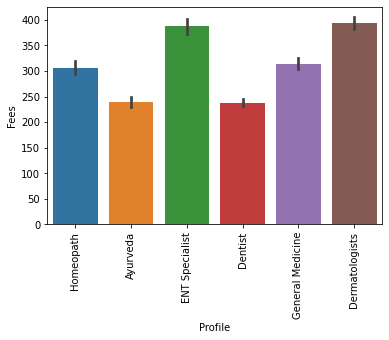

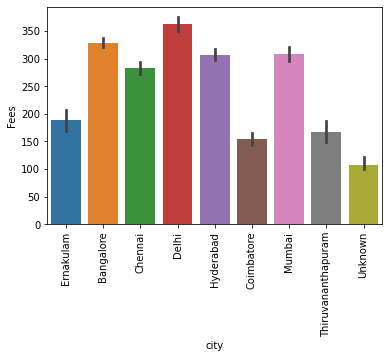

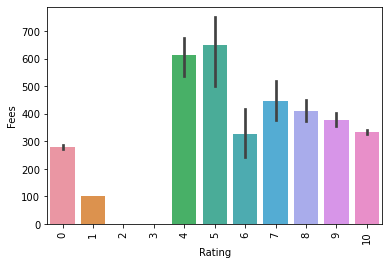

In [254]:
for i in ['Profile','city','Rating']:
    sns.barplot(x=i,y='Fees',data=df)
    plt.xticks(rotation=90)
    plt.show()

Observations:

ENT Specialist and Dermatologist have the high fee than others.

Fees are high in Delhi,Banglore,mumbai and hyderabad.

Doctos having rating of 4 and 5 have more fees.

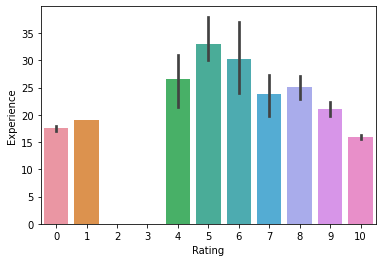

In [255]:
#Experience vs rating
sns.barplot(x='Rating',y='Experience',data=df)
plt.show()

Most experienced doctors have rating of 5 and 6 (40% to 60%).

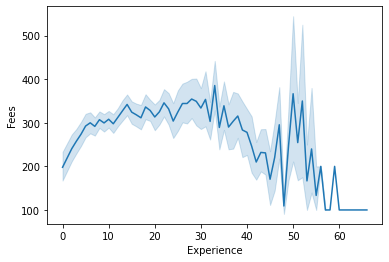

In [256]:
#Experience vs fees
sns.lineplot(x='Experience',y='Fees',data=df)
plt.show()

Doctors with experience of approx 30 years have high fees.

In [ ]:
#Dropping miscellaneous info column as it contains rating,city which we already have and locality column because we have city column.
df.drop(['Miscellaneous_Info','locality'],axis=1,inplace=True)

In [260]:
df.dtypes

Experience                                 int32
Rating                                  category
Profile                                   object
Fees                                       int64
MBBS                                       int64
BDS                                        int64
BAMS                                       int64
BHMS                                       int64
MD - Dermatology                           int64
MS - ENT                                   int64
Venereology & Leprosy                      int64
MD - General Medicine                      int64
Diploma in Otorhinolaryngology (DLO)       int64
MD - Homeopathy                            int64
city                                      object
dtype: object

In [261]:
#Converting rating to int
df['Rating']=df['Rating'].astype(int)

In [263]:
#Converting categorical column into numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    if df[i].dtypes==object:
        df[i]=le.fit_transform(df[i])

In [264]:
df.dtypes

Experience                              int32
Rating                                  int32
Profile                                 int32
Fees                                    int64
MBBS                                    int64
BDS                                     int64
BAMS                                    int64
BHMS                                    int64
MD - Dermatology                        int64
MS - ENT                                int64
Venereology & Leprosy                   int64
MD - General Medicine                   int64
Diploma in Otorhinolaryngology (DLO)    int64
MD - Homeopathy                         int64
city                                    int32
dtype: object

In [265]:
df.head()

,Experience,Rating,Profile,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,city
0,24,10,5,100,0,0,0,1,0,0,0,0,0,1,4
1,12,10,0,350,0,0,1,0,0,0,0,0,0,0,0
2,9,0,3,300,1,0,0,0,0,0,0,0,0,0,0
3,12,0,0,250,0,0,1,0,0,0,0,0,0,0,0
4,20,10,0,250,0,0,1,0,0,0,0,0,0,0,1


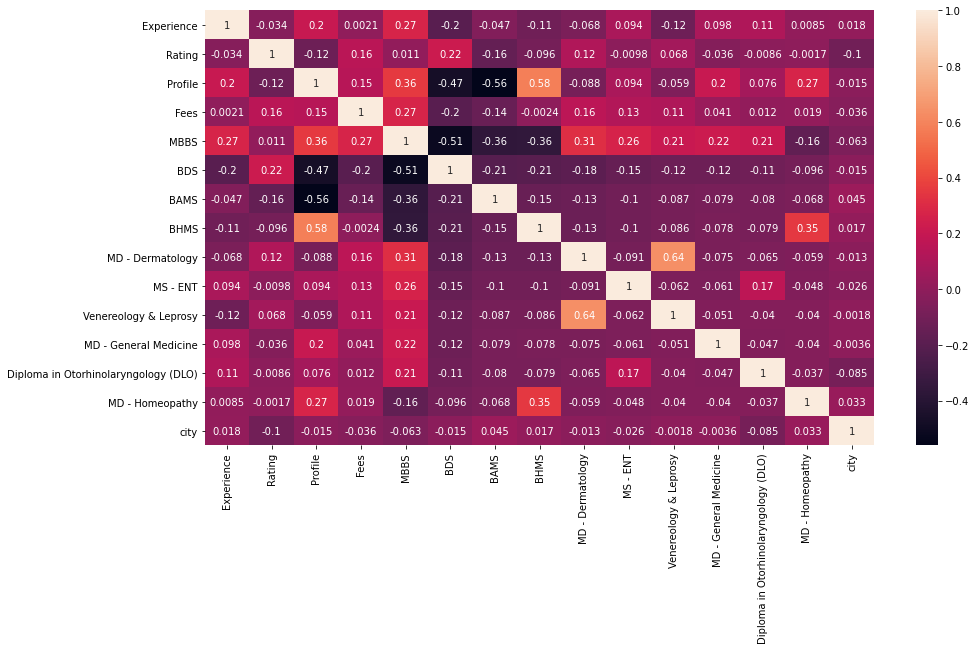

In [266]:
#Checking correlation
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

There is no strong correlation between target variable and independent variable.

As all the columns are of categorical type therefore we will not go for checking outliers and skewness.

In [275]:
#Separating target and independent variables
x=df.drop('Fees',axis=1)
y=df['Fees']

In [276]:
x.shape,y.shape

((5961, 14), (5961,))

In [271]:
#Scaling the data into standard format
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_x=sc.fit_transform(x)
df_x=pd.DataFrame(df_x,columns=x.columns)

In [272]:
x=df_x

# Finding the best random state:

In [279]:
lr=LinearRegression()
maxr2=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    predrf=lr.predict(x_test)
    r2=r2_score(y_test,predrf)
    if r2>maxr2:
        maxr2=r2
        maxrs=i
print('Best r2_score is',maxr2,'on random state', maxrs)

Best r2_score is 0.17448534512295666 on random state 27


In [280]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=27)

In [290]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4768, 14), (1193, 14), (4768,), (1193,))

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score

In [288]:
ls=Lasso()
rd=Ridge()
svr=SVR()
knn=KNeighborsRegressor()
rf=RandomForestRegressor()
ada=AdaBoostRegressor()

In [297]:
model=[lr,ls,rd,svr,knn,rf,ada]

for i in model:
    print('\n')
    print(i)
    i.fit(x_train,y_train)
    pred=i.predict(x_train)
    score=i.score(x_train,y_train)
    print('score:',score)
    print('mean absolute error:',mean_absolute_error(y_train,pred))
    print('Root mean squared error:', np.sqrt(mean_squared_error(y_train,pred)))
    print('r2_score:',r2_score(y_train,pred))



LinearRegression()
score: 0.12228355621233167
mean absolute error: 144.82891098082078
Root mean squared error: 179.05439330244613
r2_score: 0.12228355621233167


Lasso()
score: 0.11708766414303606
mean absolute error: 145.60881559263314
Root mean squared error: 179.58359296892726
r2_score: 0.11708766414303606


Ridge()
score: 0.12228240755578901
mean absolute error: 144.83339342555382
Root mean squared error: 179.0545104655314
r2_score: 0.12228240755578901


SVR()
score: 0.008829913228857067
mean absolute error: 150.9537563652249
Root mean squared error: 190.2750993231973
r2_score: 0.008829913228857067


KNeighborsRegressor()
score: 0.3364236967230174
mean absolute error: 119.93284395973156
Root mean squared error: 155.68733991690746
r2_score: 0.3364236967230174


RandomForestRegressor()
score: 0.6446763340883226
mean absolute error: 83.88535953038777
Root mean squared error: 113.92523445822368
r2_score: 0.6446763340883226


AdaBoostRegressor()
score: 0.12791809801765097
mean absolut

In [ ]:
Random forest refressor is performing good than other models with r2 score of 64%, MAE-83.54 and RMSE-113.73.

# Hyper parameter tuning:

In [298]:
from sklearn.model_selection import GridSearchCV
n_estimators = [50,100, 300, 500]
parameters=dict(n_estimators = n_estimators)

In [299]:
gcv=GridSearchCV(rf,parameters,cv=5)

In [300]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [50, 100, 300, 500]})

In [301]:
#checking the best parameters
gcv.best_params_

{'n_estimators': 500}

In [302]:
predgcv=gcv.best_estimator_.predict(x_train)
print('mean absolute error:',mean_absolute_error(y_train,predgcv))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_train,predgcv)))
print('r2_score:',r2_score(y_train,predgcv))

mean absolute error: 83.48271775139955
Root mean squared error: 113.42615734357318
r2_score: 0.647782678063739


In [347]:
#Saving our model
import joblib
joblib.dump(gcv.best_estimator_,'Doctor_fees_rf.obj')

['Doctor_fees_rf.obj']

In [305]:
#importing Test data
df_test=pd.read_excel('Final_Test.xlsx')

In [306]:
df_test.shape

(1987, 6)

We have 1987 rows and 6 columns.

In [307]:
df_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [308]:
#columns name
df_test.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info'],
      dtype='object')

Columns name:

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaneous_Info: Extra information about the doctor

Place: Area and the city where the doctor is located.

In [310]:
#Checking data type
df_test.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object

All are of object type.

In [311]:
df_test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

Rating, place and miscellaneous info have null values.

In [312]:
#Creating a new column qualification count to see how many qualification each doctor have
df_test['Qualification_count'] = df_test['Qualification'].apply(lambda x: len(x.split(",")))
df_test['Qualification_count'].value_counts()

2     889
1     609
3     366
4      87
5      28
6       5
17      1
9       1
7       1
Name: Qualification_count, dtype: int64

In [313]:
df_test['Qualification'].unique()

array(['MBBS', 'MBBS, Diploma in Otorhinolaryngology (DLO)', 'MBBS, DDVL',
       'BAMS', 'BDS, MDS - Conservative Dentistry & Endodontics',
       'BDS, MDS', 'BDS, MDS - Pedodontics',
       'MD - Ayurveda Medicine, BAMS, Yoga Teachers Training Course, M. D. IN KAYACHIKISTA',
       'BHMS', 'BDS', 'MBBS, FCD - Diabetology', 'MBBS, DDV',
       'MBBS, MD - Dermatology', 'MS - ENT',
       'MBBS, Diploma in Otorhinolaryngology (DLO), MS - ENT, DNB - ENT, MNAMS (Membership of the National Academy)',
       'BHMS, Diploma in Naturopathy & Yogic Science (DNYS), Diploma in Diet and Nutrition, Diploma in Cosmetology',
       'MBBS, PG Diploma In Clinical Cosmetology (PGDCC)',
       'BDS, MDS - Periodontics', 'BDS, MDS- Oral Pathology',
       'MBBS, MD - General Medicine', 'MS - ENT, MBBS',
       'MBBS, Diploma in Otorhinolaryngology (DLO), DNB - ENT',
       'MBBS, MS - ENT, DNB - Otorhinolaryngology',
       'BDS, PhD - Endodontics, MDS - Conservative Dentistry & Endodontics',
       'B

In [314]:
# creating dict of qualification with there counts
df_test["Qualification"]=df_test["Qualification"].str.split(",")
Qualification ={}
for x in df_test["Qualification"].values:
    for each in x:
        each=each.strip()
        if each in Qualification:
            Qualification[each]+=1
        else:
            Qualification[each]=1

In [315]:
#Extracting top 10 qualification
most_qual=sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final_qual=[]
for qual in most_qual:
    final_qual.append(qual[0])
    
print(final_qual)

['MBBS', 'BDS', 'BHMS', 'BAMS', 'MD - Dermatology', 'MS - ENT', 'MD - General Medicine', 'Venereology & Leprosy', 'Diploma in Otorhinolaryngology (DLO)', 'DDVL']


In [316]:
#Encoding extracted top 10 qualification into the dataset as new columns.
for qual in final_qual:
    df_test[qual]=0

for x,y in zip(df_test['Qualification'].values, np.array([i for i in range(len(df_test))])):
    for c in x:
        c=c.strip()
        if c in final_qual:
            df_test[c][y]=1

In [317]:
# Now we can drop the qualification and qualification count columns 
df_test.drop(['Qualification','Qualification_count'],axis=1,inplace=True)

In [318]:
# Extracting only experience Year from Experience column and converting it to Numeric.
df_test['Experience'] = df_test['Experience'].str.split().str[0]
df_test['Experience'] = df_test['Experience'].astype(int)

In [319]:
#As, there are missing values in Place column so we will replace them with Unknown, Unknown(locality,city) to represent them. So that we can easily extract city and locality from Place variable.
df_test.Place.fillna('Unknown,Unknown',inplace=True)

#Separating locality and city in individual columns.
df_test['locality']=df_test['Place'].str.split(",").str[0]
df_test['city']=df_test['Place'].str.split(",").str[1]

#Now we can drop the place variable
df_test.drop('Place',axis=1,inplace=True)

In [321]:
df_test.head()

,Experience,Rating,Profile,Miscellaneous_Info,MBBS,BDS,BHMS,BAMS,MD - Dermatology,MS - ENT,MD - General Medicine,Venereology & Leprosy,Diploma in Otorhinolaryngology (DLO),DDVL,locality,city
0,35,NaN,General Medicine,NaN,1,0,0,0,0,0,0,0,0,0,Ghatkopar East,Mumbai
1,31,NaN,ENT Specialist,NaN,1,0,0,0,0,0,0,0,1,0,West Marredpally,Hyderabad
2,40,70%,Dermatologists,"70% 4 Feedback KK Nagar, Chennai",1,0,0,0,0,0,0,0,0,1,KK Nagar,Chennai
3,0,NaN,Ayurveda,NaN,0,0,0,1,0,0,0,0,0,0,New Ashok Nagar,Delhi
4,16,100%,Dentist,General Dentistry Conservative Dentistry Cosme...,0,1,0,0,0,0,0,0,0,0,Kanakpura Road,Bangalore


In [322]:
# Filling the missing values in rating column with -99% to provide them different importance.
df_test['Rating'].fillna('-99%',inplace=True)

In [323]:
# extracting value of rating to avoid '%' and converting it to numeric
df_test['Rating'] = df_test['Rating'].str.slice(stop=-1).astype(int)

In [324]:
#Creating bins for ratings
bins=[-99,0,10,20,30,40,50,60,70,80,90,100]
labels=[i for i in range(11)]
df_test['Rating']=pd.cut(df_test['Rating'], bins=bins, labels=labels, include_lowest=True)

In [325]:
#Checking the bins created
df_test['Rating'].value_counts().sort_index()

0     1090
1        0
2        0
3        0
4        0
5        0
6        9
7       14
8       27
9      108
10     739
Name: Rating, dtype: int64

In [327]:
#Checking unique cities
df_test['city'].unique()

array([' Mumbai', ' Hyderabad', ' Chennai', ' Delhi', ' Bangalore',
       ' Coimbatore', ' Thiruvananthapuram', ' Ernakulam', 'Unknown'],
      dtype=object)

In [328]:
# removing the extra spaces before the city
import re
df_test['city'] = df_test['city'].apply(lambda x: re.sub(' +','',str(x)))

In [330]:
#Dropping miscellaneous info column as it contains rating,city which we already have and locality column because we have city column.
df_test.drop(['Miscellaneous_Info','locality'],axis=1,inplace=True)

In [332]:
df_test.dtypes

Experience                                 int32
Rating                                  category
Profile                                   object
MBBS                                       int64
BDS                                        int64
BHMS                                       int64
BAMS                                       int64
MD - Dermatology                           int64
MS - ENT                                   int64
MD - General Medicine                      int64
Venereology & Leprosy                      int64
Diploma in Otorhinolaryngology (DLO)       int64
DDVL                                       int64
city                                      object
dtype: object

In [336]:
#Converting rating to int
df_test['Rating']=df_test['Rating'].astype(int)

In [334]:
#Converting categorical column into numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df_test.columns:
    if df_test[i].dtypes==object:
        df_test[i]=le.fit_transform(df_test[i])

In [337]:
df_test.dtypes

Experience                              int32
Rating                                  int32
Profile                                 int32
MBBS                                    int64
BDS                                     int64
BHMS                                    int64
BAMS                                    int64
MD - Dermatology                        int64
MS - ENT                                int64
MD - General Medicine                   int64
Venereology & Leprosy                   int64
Diploma in Otorhinolaryngology (DLO)    int64
DDVL                                    int64
city                                    int32
dtype: object

In [338]:
#Scaling the data into standard format
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_x=sc.fit_transform(df_test)
df_x=pd.DataFrame(df_x,columns=df_test.columns)

In [339]:
df_test=df_x

In [348]:
#importing the model
fee_model=joblib.load('Doctor_fees_rf.obj')

In [350]:
#Predicitng the fees
x=fee_model.predict(df_test)

In [351]:
x

array([221.57227994, 201.10304473, 236.01737013, ..., 240.47336219,
       121.2408189 , 260.02641775])

In [353]:
#creating dataframe of the result
df_a = pd.DataFrame(x)

In [354]:
df_a

,0
0,221.572280
1,201.103045
2,236.017370
3,142.816537
4,121.240819
...,...
1982,142.816537
1983,260.026418
1984,240.473362
1985,121.240819


In [358]:
#Saving the result to excel file
df_a.to_excel('Fee_result.xlsx', index=False)

In [359]:
#Viewing the results
d=pd.read_excel('Fee_result.xlsx')

In [360]:
d

,0
0,221.572280
1,201.103045
2,236.017370
3,142.816537
4,121.240819
...,...
1982,142.816537
1983,260.026418
1984,240.473362
1985,121.240819
